# #04 - Exploring Grid

<!-- - Falar sobre a problemática: muitos dados e etc, custo de processamento -->
In trajectories data mining process, there is a need frequent acess differents segments and  samples of trajectories. With big volume data, those acesses can need time and processing. With this, it's necessary to adopt effective techniques to management and handling of this data, allowed fast recovery of data.


<!-- - Introduzir o conceito de grid e seus benefícios -->
One approach to this technique takes geographic space into account, dividing it into grids, the so-called **grids**, and **creating a time index for the trajectories that fall into each cell of this grid**. **Each segment** that falls into a grid **is represented by a point with coordinates equal to the start time point and the end time point of the segment**.


<!-- - Falar sobre como é considerado o conceito de grid no Pymove -->

In PyMove, grids are delimited by coordinates in a 
cartesian plan based tracing in bound box of data. Grids are represented by objects that have those attributes:

- **lon_min_x:** minimum longitude.
- **lat_min_y:** minimum latitude. 
- **grid_size_lat_y:** grid latitude size. 
- **grid_size_lon_x:** grid longitude size.
- **cell_size_by_degree:** cell size of Grid.

### Let's go!


### Imports



In [1]:
import pandas as pd
from pymove import MoveDataFrame
from pymove.core.grid import Grid

### Load data

In [2]:
df = pd.read_csv('geolife_sample.csv', parse_dates=['datetime'])
data = MoveDataFrame(df, latitude="lat", longitude="lon", datetime="datetime")
data = data[:1000]
data

,lat,lon,datetime,id
0,39.984094,116.319236,2008-10-23 05:53:05,1
1,39.984198,116.319322,2008-10-23 05:53:06,1
2,39.984224,116.319402,2008-10-23 05:53:11,1
3,39.984211,116.319389,2008-10-23 05:53:16,1
4,39.984217,116.319422,2008-10-23 05:53:21,1
...,...,...,...,...
995,40.013765,116.306468,2008-10-23 23:43:31,1
996,40.013828,116.306413,2008-10-23 23:43:36,1
997,40.013905,116.306365,2008-10-23 23:43:41,1
998,40.013992,116.306323,2008-10-23 23:43:46,1


--- 
## Create virtual Grid

In [3]:
grid = Grid(data, 15)


Creating a virtual grid without polygons
...cell size by degree: 0.0001353464801860623
...grid_size_lat_y:341
grid_size_lon_x:266

..A virtual grid was created


In [4]:
grid.get_grid()

{'lon_min_x': 116.30546799999999,
 'lat_min_y': 39.970511,
 'grid_size_lat_y': 341,
 'grid_size_lon_x': 266,
 'cell_size_by_degree': 0.0001353464801860623}

---

## Create one polygon to point on grid

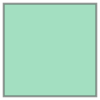

In [5]:
grid.create_one_polygon_to_point_on_grid(2, 1)

---

## Create or update index grid feature

In [6]:
grid.create_update_index_grid_feature(data)


Creating or updating index of the grid feature..

...[1000,1000] indexes were created to lat and lon


In [7]:
data.head()

,lat,lon,datetime,id,index_grid
0,39.984094,116.319236,2008-10-23 05:53:05,1,34541
1,39.984198,116.319322,2008-10-23 05:53:06,1,34883
2,39.984224,116.319402,2008-10-23 05:53:11,1,34883
3,39.984211,116.319389,2008-10-23 05:53:16,1,34883
4,39.984217,116.319422,2008-10-23 05:53:21,1,35224


---

## Create all polygons to all point on grid

In [8]:
data = grid.create_all_polygons_to_all_point_on_grid(data, unique_index=False)


Creating or updating index of the grid feature..

...[1000,1000] indexes were created to lat and lon
           lat         lon            datetime  id  index_grid  \
0    39.984094  116.319236 2008-10-23 05:53:05   1       34541   
1    39.984198  116.319322 2008-10-23 05:53:06   1       34883   
2    39.984224  116.319402 2008-10-23 05:53:11   1       34883   
3    39.984211  116.319389 2008-10-23 05:53:16   1       34883   
4    39.984217  116.319422 2008-10-23 05:53:21   1       35224   
..         ...         ...                 ...  ..         ...   
995  40.013765  116.306468 2008-10-23 23:43:31   1        2706   
996  40.013828  116.306413 2008-10-23 23:43:36   1        2366   
997  40.013905  116.306365 2008-10-23 23:43:41   1        2366   
998  40.013992  116.306323 2008-10-23 23:43:46   1        2367   
999  40.014089  116.306264 2008-10-23 23:43:51   1        2026   

     index_grid_lat  index_grid_lon  
0               100             101  
1               101          

...polygons were created


In [9]:
data.head()

,id,index_grid_lat,index_grid_lon,polygon
0,1,100,101,"POLYGON ((39.98404564801861 116.3191379944988,..."
1,1,101,102,"POLYGON ((39.98418099449879 116.319273340979, ..."
4,1,101,103,"POLYGON ((39.98418099449879 116.319273340979, ..."
5,1,104,106,"POLYGON ((39.98418099449879 116.319273340979, ..."
6,1,104,105,"POLYGON ((39.98418099449879 116.3194086874592,..."


## Create all polygons on grid

In [10]:
grid.create_all_polygons_on_grid()


Creating all polygons on virtual grid


...geometries saved on Grid grid_polygon property


In [11]:
(grid.grid_polygon).shape

(341, 266)

## Get point to index grid 

In [12]:
grid.point_to_index_grid(39.984094, 116.319236)

...[1,1] indexes were created to lat and lon


(100.0, 101.0)

## Save grid to .pkl

In [13]:
grid.save_grid_pkl('teste.pkl')


A file was saved


# Read .pkl to grid

In [14]:
grid.read_grid_pkl('teste.pkl').get_grid()

{'lon_min_x': 116.30546799999999,
 'lat_min_y': 39.970511,
 'grid_size_lat_y': 341,
 'grid_size_lon_x': 266,
 'cell_size_by_degree': 0.0001353464801860623}

# Show a grid polygons

In [15]:
data = data[data['id'] == 1]
data

,id,index_grid_lat,index_grid_lon,polygon
0,1,100,101,"POLYGON ((39.98404564801861 116.3191379944988,..."
1,1,101,102,"POLYGON ((39.98418099449879 116.319273340979, ..."
4,1,101,103,"POLYGON ((39.98418099449879 116.319273340979, ..."
5,1,104,106,"POLYGON ((39.98418099449879 116.319273340979, ..."
6,1,104,105,"POLYGON ((39.98418099449879 116.3194086874592,..."
...,...,...,...,...
772,1,318,7,"POLYGON ((40.01003217221433 116.3146715606526,..."
782,1,320,7,"POLYGON ((40.01016751869452 116.3145362141725,..."
807,1,320,8,"POLYGON ((40.01016751869452 116.3145362141725,..."
988,1,319,8,"POLYGON ((40.0103028651747 116.3144008676923, ..."


id tid


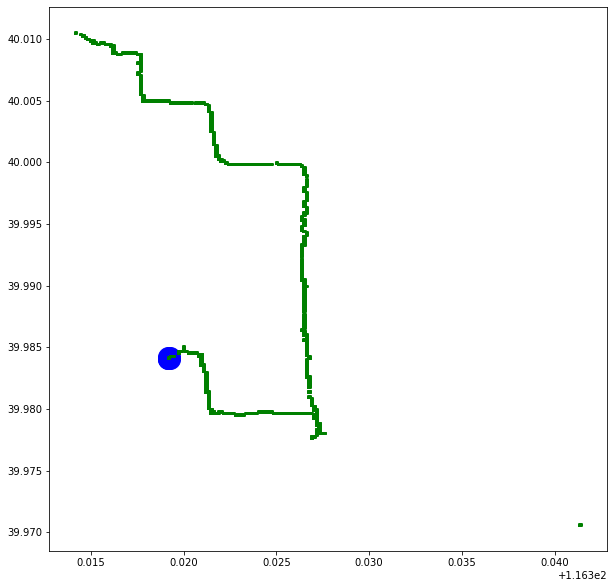

In [16]:
grid.show_grid_polygons(data, 1, return_fig=False)